# **E-commerce Marketing EDA & Hypothesis testing**

## Marketing Campaign Dataset Description

- **ID:** Customer's Unique Identifier

- **Year_Birth:** Customer's Birth Year

- **Education:** Customer's education level (Graduation, Master, PhD, 2n Cycle(Diploma), Basic)

- **Marital_Status:** Customer's marital status

- **Income:** Customer's yearly household income

- **Kidhome:** Number of children in customer's household

- **Teenhome:** Number of teenagers in customer's household

- **Dt_Customer:** Date of customer's enrollment with the company

- **Recency:** Number of days since customer's last purchase

- **MntWines:** Amount spent on wine in the last 2 years

- **MntFruits:** Amount spent on fruits in the last 2 years

- **MntMeatProducts:** Amount spent on meat in the last 2 years

- **MntFishProducts:** Amount spent on fish in the last 2 years

- **MntSweetProducts:** Amount spent on sweets in the last 2 years

- **MntGoldProds:** Amount spent on gold in the last 2 years

- **NumDealsPurchases:** Number of purchases made with a discount

- **NumWebPurchases:** Number of purchases made through the company's web site

- **NumCatalogPurchases:** Number of purchases made using a catalogue

- **NumStorePurchases:** Number of purchases made directly in stores

- **NumWebVisitsMonth:** Number of visits to company's web site in the last month

- **AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise (Target variable)

- **AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise (Target variable)

- **AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise (Target variable)

- **AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise (Target variable)

- **AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise (Target variable)

- **Complain:** 1 if customer complained in the last 2 years, 0 otherwise

- **Country:** Customer's location

## Importing Libraries and Loading Datasets

In [89]:
# importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Loading dataset
!gdown 1E-llv0qvRujhRIng_A46-yHTJErHBb2R

df = pd.read_csv('/content/campaign - campaign.csv')

Downloading...
From: https://drive.google.com/uc?id=1E-llv0qvRujhRIng_A46-yHTJErHBb2R
To: /content/campaign - campaign.csv
100% 220k/220k [00:00<00:00, 5.56MB/s]


## Basic Metrics

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,4,6,1,0,0,0,0,0,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,3,7,5,0,0,0,0,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,2,5,2,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,0,2,7,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,1,2,7,1,0,0,0,0,0,SP


In [ ]:
# shape
df.shape

(2239, 27)

In [ ]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2239 non-null   int64 
 1   Year_Birth           2239 non-null   int64 
 2   Education            2239 non-null   object
 3   Marital_Status       2239 non-null   object
 4   Income               2239 non-null   object
 5   Kidhome              2239 non-null   int64 
 6   Teenhome             2239 non-null   int64 
 7   Dt_Customer          2239 non-null   object
 8   Recency              2239 non-null   int64 
 9   MntWines             2239 non-null   int64 
 10  MntFruits            2239 non-null   int64 
 11  MntMeatProducts      2239 non-null   int64 
 12  MntFishProducts      2239 non-null   int64 
 13  MntSweetProducts     2239 non-null   int64 
 14  MntGoldProds         2239 non-null   int64 
 15  NumDealsPurchases    2239 non-null   int64 
 16  NumWeb

In [ ]:
# checking duplicates
df.duplicated().sum()

0

In [ ]:
# Checking Nulls
df.isna().sum().sum()

0

## Data Processing and Adding Features

In [90]:
df['Income'] = df['Income'].str.replace('$','')
df['Income'] = df['Income'].str.replace(',','')
df['Income'] = df['Income'].str.replace('nan','0')
df['Income'] = pd.to_numeric(df['Income'])
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,4,6,1,0,0,0,0,0,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,3,7,5,0,0,0,0,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,2,5,2,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,0,2,7,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,1,2,7,1,0,0,0,0,0,SP


In [91]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')
df['Age'] = df['Dt_Customer'].dt.year - df['Year_Birth']

df['Enrolled_month'] = df['Dt_Customer'].dt.month_name()
df['Enrolled_year'] = df['Dt_Customer'].dt.year
df['Enrolled_day'] = df['Dt_Customer'].dt.day

df.drop('Dt_Customer', axis=1, inplace=True)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country,Age,Enrolled_month,Enrolled_year,Enrolled_day
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189,104,...,0,0,0,0,0,SP,44,June,2014,16
1,1,1961,Graduation,Single,57091.0,0,0,0,464,5,...,0,0,0,1,0,CA,53,June,2014,15
2,10476,1958,Graduation,Married,67267.0,0,1,0,134,11,...,0,0,0,0,0,US,56,May,2014,13
3,1386,1967,Graduation,Together,32474.0,1,1,0,10,0,...,0,0,0,0,0,AUS,47,May,2014,11
4,5371,1989,Graduation,Single,21474.0,1,0,0,6,16,...,0,0,0,0,0,SP,25,April,2014,8


## Descriptive Statistics

In [92]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2239.0,5590.444841,3246.372471,0.0,2827.5,5455.0,8423.5,11191.0
Year_Birth,2239.0,1968.802144,11.985494,1893.0,1959.0,1970.0,1977.0,1996.0
Income,2239.0,51412.792765,22069.582225,0.0,34716.0,51039.0,68277.5,162397.0
Kidhome,2239.0,0.443948,0.538390,0.0,0.0,0.0,1.0,2.0
Teenhome,2239.0,0.506476,0.544555,0.0,0.0,0.0,1.0,2.0
Recency,2239.0,49.121036,28.963662,0.0,24.0,49.0,74.0,99.0
MntWines,2239.0,304.067441,336.614830,0.0,24.0,174.0,504.5,1493.0
MntFruits,2239.0,26.307727,39.781468,0.0,1.0,8.0,33.0,199.0
MntMeatProducts,2239.0,167.016525,225.743829,0.0,16.0,67.0,232.0,1725.0
MntFishProducts,2239.0,37.538633,54.637617,0.0,3.0,12.0,50.0,259.0


- This is the data of enrolled customers for an ecommerce comany from July 10, 2012 to June 29, 2014 i.e., over a period of 2 years.
- Age of the enrolled customers ranges from 16 to 121 with a mean of 44.
- Yearly income of enrolled customers ranges from 0 to 1.6M USD with a mean of 51K USD.
- Average Recency of the customers is 49 days.

In [93]:
df.describe(include='object')

,Education,Marital_Status,Country,Enrolled_month
count,2239,2239,2239,2239
unique,5,8,8,12
top,Graduation,Married,SP,August
freq,1126,864,1095,222


- Most of the Enrolled customers have done graduation.
- Most of the Enrolled customers are Married.
- Most of the Enrolled customers are from Country Spain.
- Most of the Enrollments happened in August month.

## Univarient Analysis

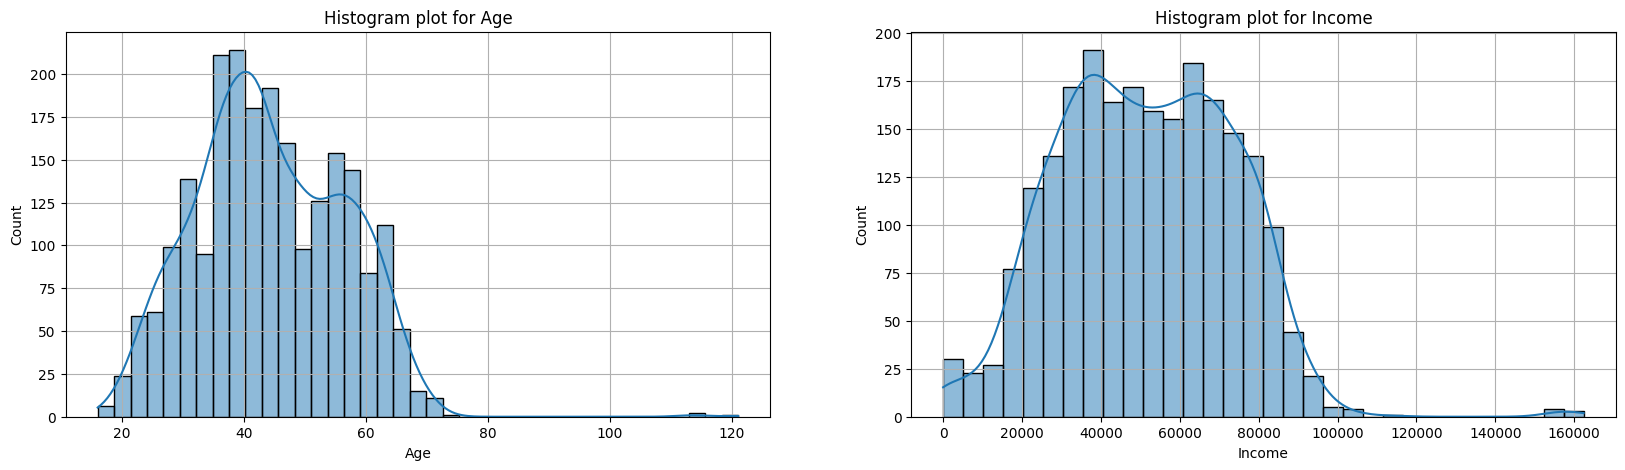

In [94]:
plt.figure(figsize=(20,5))

cols = ['Age', 'Income']

for i in cols:
  plt.subplot(1,2,cols.index(i)+1)
  plt.title('Histogram plot for '+ i)
  plt.grid(True)
  sns.histplot(data=df[i], kde=True)

plt.show()

- Most of the customers enrolled are in the age range of 20 to 70, while most of them are around 40.
- Most of the enrolled customer's yearly income is within 1M USD.

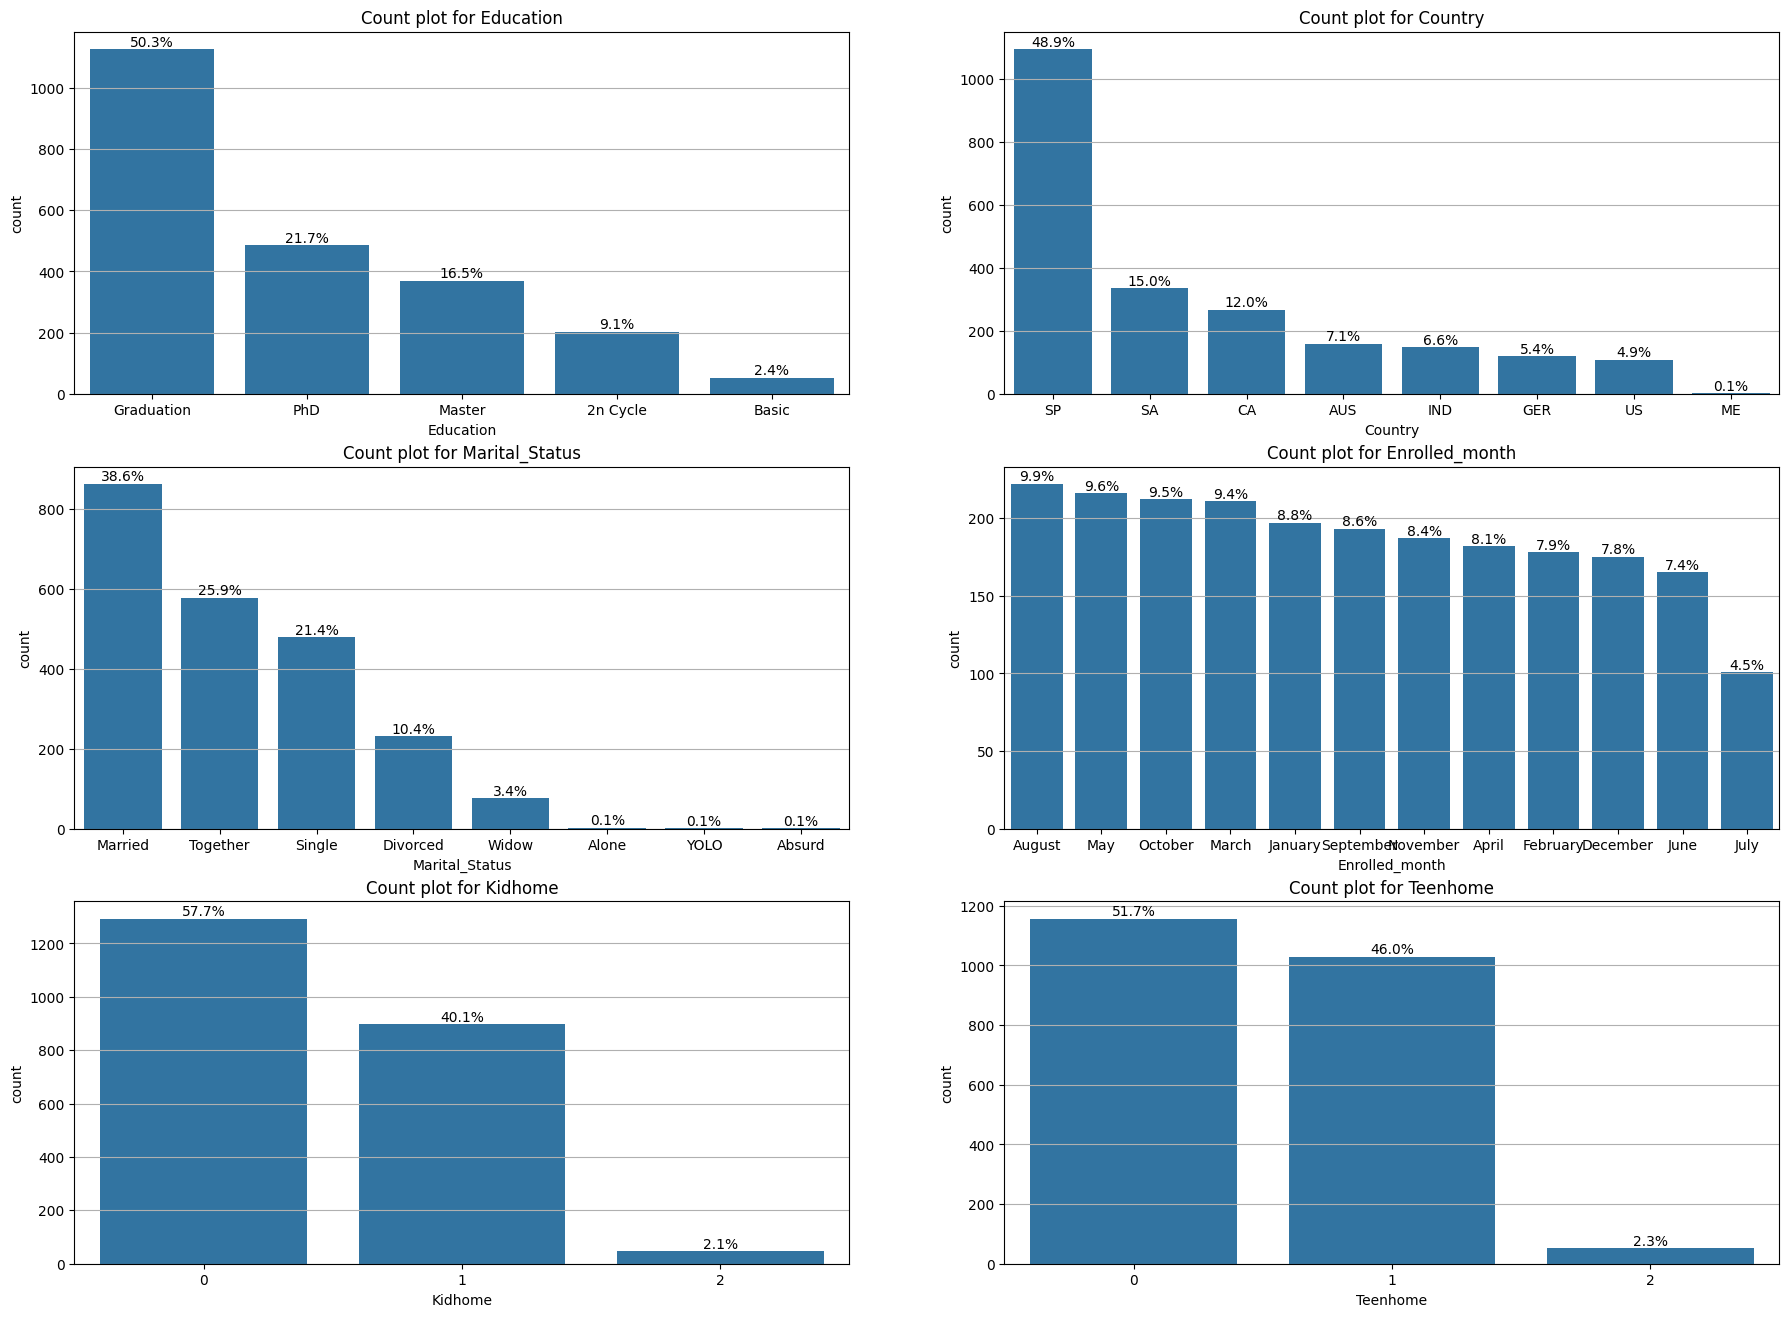

In [95]:
plt.figure(figsize=(22,16))

cols = ['Education','Country', 'Marital_Status', 'Enrolled_month','Kidhome', 'Teenhome']

for i in cols:
  plt.subplot(3,2,cols.index(i)+1)
  plt.title('Count plot for '+ i)
  plt.grid(True)
  g = sns.countplot(df, x=i, order=df[i].value_counts().index)
  for j in g.patches:
    plt.text(x=j.get_x()+j.get_width()/2, y=j.get_height(), s=str(round(((j.get_height()/2239)*100),1)) + '%', ha='center', va='bottom')

plt.show()

- 50% of the customers has Graduation as higher qualification, followed by PhD with 22% and Masters with 16%.
- 49% of the customers are from country Spain, followed by South Africa with 15%.
- 39% of the customers are Married whereas 26% are living together and 21% are Singles.
- 10% of the enrollments happened in August, May, October and March with an average of 9.5% and rest below 9%.
- Around 55% of the customers don't have child and 43% has 1 child.

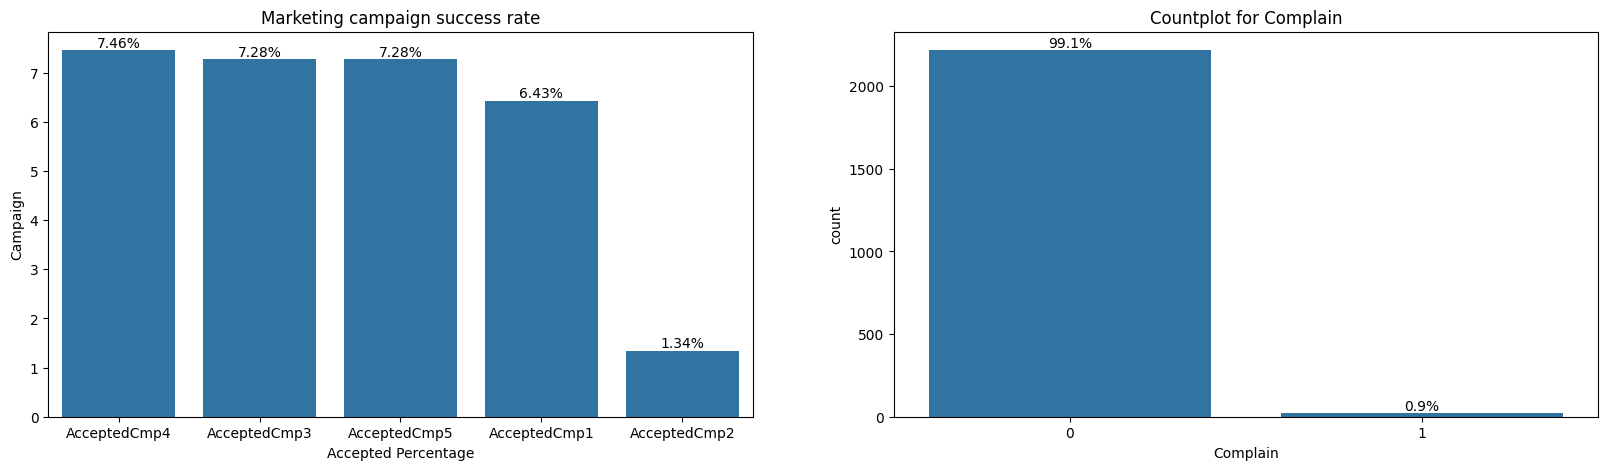

In [96]:
camp_success = pd.DataFrame(df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].mean().round(4)*100,  columns=['Percent']).reset_index()

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Marketing campaign success rate')
g = sns.barplot(y='Percent', x='index', data=camp_success.sort_values('Percent',ascending=False))
for j in g.patches:
    plt.text(x=j.get_x()+j.get_width()/2, y=j.get_height(), s=str(j.get_height()) + '%', ha='center', va='bottom')
plt.xlabel('Accepted Percentage')
plt.ylabel('Campaign')

plt.subplot(1,2,2)
plt.title('Countplot for Complain')
g = sns.countplot(df, x='Complain', order=df['Complain'].value_counts().index)
for j in g.patches:
    plt.text(x=j.get_x()+j.get_width()/2, y=j.get_height(), s=str(round(((j.get_height()/2239)*100),1)) + '%', ha='center', va='bottom')

plt.show()

- 4th Campaign is the most successful campaign with 7.4% enrollments, followed by 3 and 5 with 7.2% and 1 with 6.4%
- 2nd Campaign is the least successful with 1.3% enrollments.
- Only 1% of the Customers made complaints.

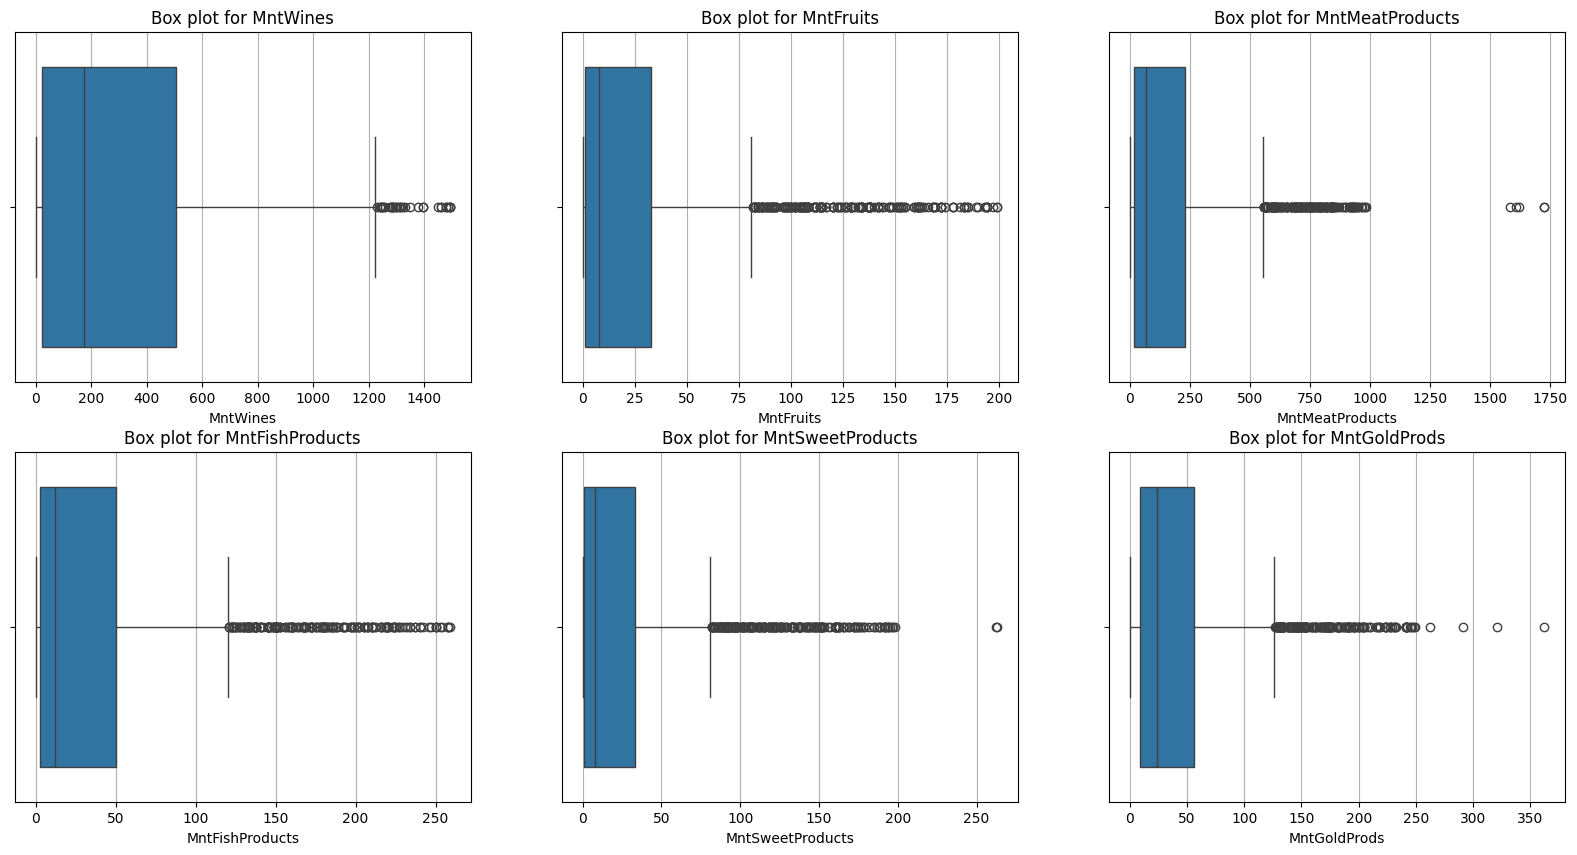

,0
MntWines,680807
MntFruits,58903
MntMeatProducts,373950
MntFishProducts,84049
MntSweetProducts,60620
MntGoldProds,98597


In [97]:
cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

plt.figure(figsize=(20,10))

for i in cols:
  plt.subplot(2,3,cols.index(i)+1)
  plt.title('Box plot for '+ i)
  plt.grid(True)
  sns.boxplot(df, x=i)

plt.show()

df[cols].sum()

- Total Wine sales in these 2 years is 6.8M USD where each customer usually spent upto 500 USD.
- Total Fruit sales in these 2 years is 58K USD where each customer usually spent upto 30 USD.
- Total Meat sales in these 2 years is 3.7M USD where each customer usually spent upto 250 USD.
- Total Fish sales in these 2 years is 84K USD where each customer usually spent upto 50 USD.
- Total Sweet sales in these 2 years is 60K USD where each customer usually spent upto 40 USD.
- Total Gold sales in these 2 years is 98K USD where each customer usually spent upto 60 USD.

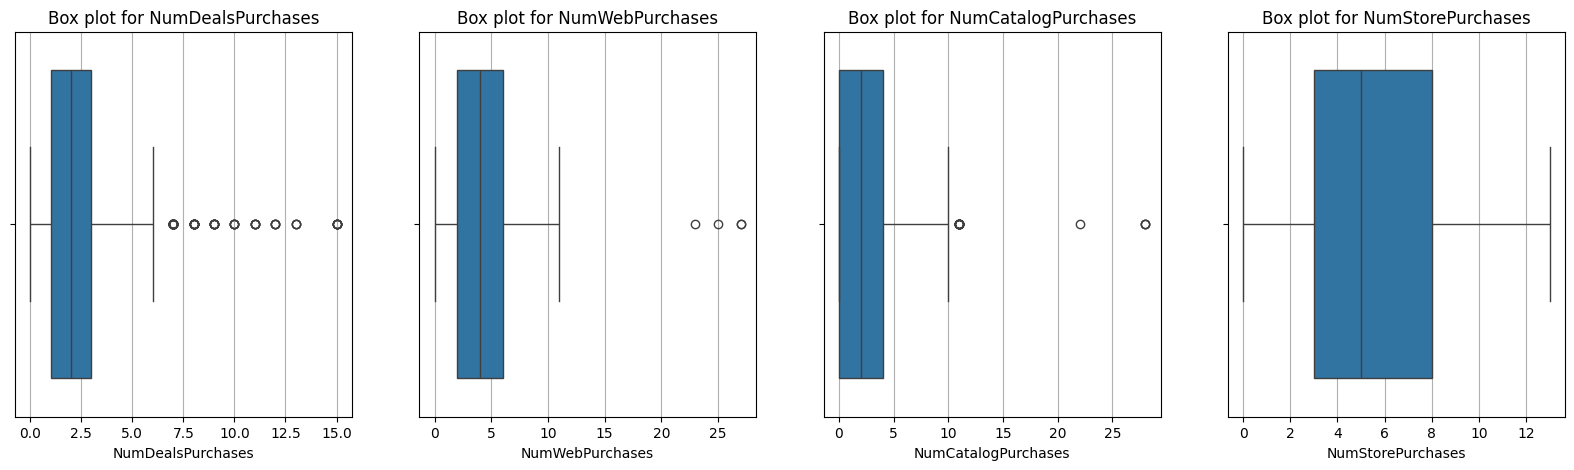

,0
NumDealsPurchases,5204
NumWebPurchases,9147
NumCatalogPurchases,5962
NumStorePurchases,12967


In [98]:
cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

plt.figure(figsize=(20,5))

for i in cols:
  plt.subplot(1,4,cols.index(i)+1)
  plt.title('Box plot for '+ i)
  plt.grid(True)
  sns.boxplot(df, x=i)

plt.show()

df[cols].sum()

- 5204 purchases are made with a discount in these 2 years where each customer usually make upto 3 purchases.
- 9147 purchases are made through the company's web site in these 2 years where each customer make upto 6 purchases.
- 5962 purchases are made made using a catalogue in these 2 years where each customer make upto 4 purchases.
- 12967 purchases are made directly in stores in these 2 years where each customer make upto 8 purchases.

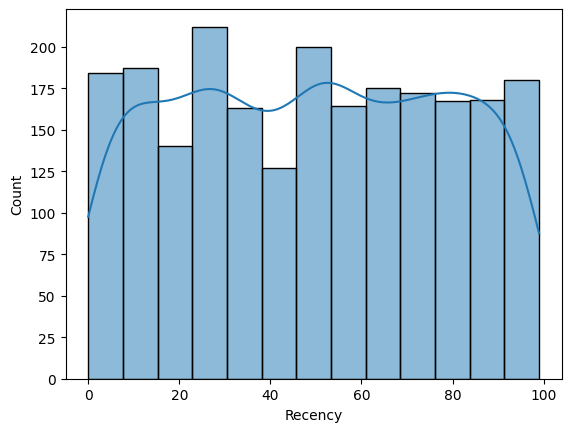

In [99]:
sns.histplot(df, x='Recency', kde=True)
plt.show()

- Recency of the customers is ranges from 0 to 100

## Hypothesis Testing

### Is income of customers dependent on their education?

In [100]:
df.groupby('Education')['Income'].mean()

,Income
Education,
2n Cycle,46929.251232
Basic,20306.259259
Graduation,51660.098579
Master,52202.432432
PhD,55567.687243


As this is the categorical vs numerical having more than 2 categorical variables, we have to use ANOVA (if satisfies assumptions of anova) or Kruskal Wallis test

#### Checking assumptions of ANOVA

**Assumptions of ANOVA:**

1. Data should be normally distributed (QQ plot and shapiro test)
2. Data should be independent across each record
3. Equal variance in different groups (levene test)

As data is independent, we can check for normality and equal variance

##### QQ Plot for checking Normality

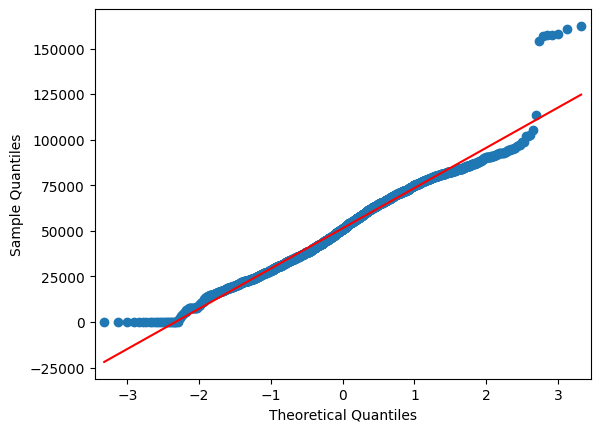

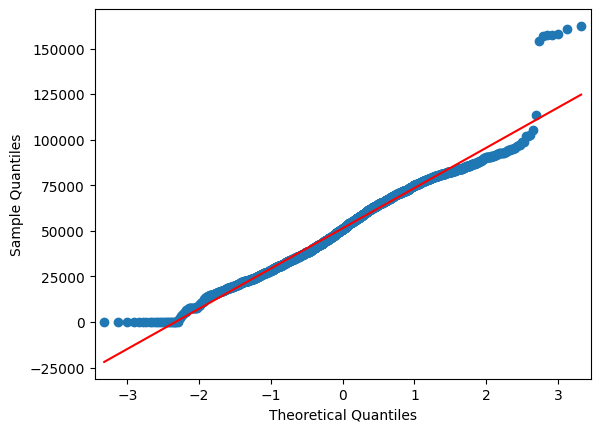

In [101]:
import statsmodels.api as sm
sm.qqplot(df['Income'], line ='s')

- As the data contains outliers we can say that the data is not normally distributed. Lets confirm this with Shapiro test.

##### Shapiro test for checking Normality

In [102]:
test_stat, p_value = stats.shapiro(df['Income'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.005644794082171053
The sample does not follow normal distribution


We can say that data is not normally distributed. Let's check variance.

##### Levene's Test for checking Equal Variance

In [103]:
income_by_education = [df[df['Education'] == edu]['Income'].dropna() for edu in df['Education'].unique()]

In [104]:
test_stat, p_value = stats.levene(*income_by_education)
print('p-value', p_value)
if p_value < 0.5:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 2.846067960002927e-14
The samples do not have Homogenous Variance


We can see that this Income date does not follows assumptions of ANOVA. So we have to use Kruskal Walli's Test

#### Kruskal Walli's Test

**Null Hypothesis:** The mean income of customers is the same across all education levels (i.e., income is independent of education).

**Alternate Hypothesis:** The mean income of customers is different across at least one education level (i.e., income is dependent on education).

In [105]:
H0 = 'The mean income of customers is the same across all education levels (i.e., income is independent of education)'
Ha = 'The mean income of customers is different across at least one education level (i.e., income is dependent on education)'
alpha = 0.05

# kruskal wallis test
h_stat, p_val = stats.kruskal(*income_by_education)

print(f'h_stat: {h_stat}')
print(f'p-value: {p_val}')
print(f'alpha: {alpha}\n')
if p_val < alpha:
  print('Result: Reject Null Hypothesis')
  print(Ha)
else:
  print('Result: Failed to reject Null Hypothesis')
  print(H0)

h_stat: 136.61469286229072
p-value: 1.4971856049770543e-28
alpha: 0.05

Result: Reject Null Hypothesis
The mean income of customers is different across at least one education level (i.e., income is dependent on education)


### Do higher income people spend more (take into account spending in all categories together)?

In [106]:
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country,Age,Enrolled_month,Enrolled_year,Enrolled_day,Total_Spending
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189,104,...,0,0,0,0,SP,44,June,2014,16,1190
1,1,1961,Graduation,Single,57091.0,0,0,0,464,5,...,0,0,1,0,CA,53,June,2014,15,577
2,10476,1958,Graduation,Married,67267.0,0,1,0,134,11,...,0,0,0,0,US,56,May,2014,13,251
3,1386,1967,Graduation,Together,32474.0,1,1,0,10,0,...,0,0,0,0,AUS,47,May,2014,11,11
4,5371,1989,Graduation,Single,21474.0,1,0,0,6,16,...,0,0,0,0,SP,25,April,2014,8,91


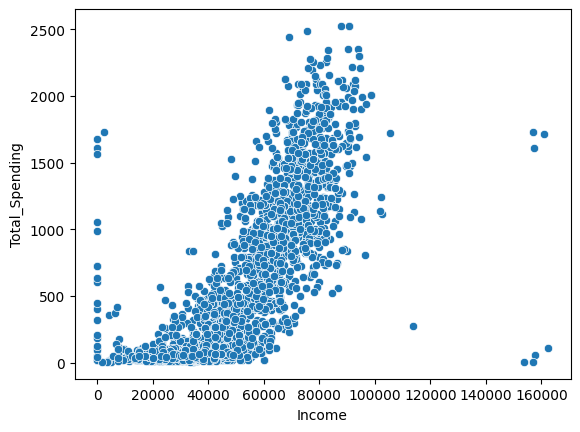

In [107]:
sns.scatterplot(data = df, x = 'Income', y = 'Total_Spending')
plt.show()

As this is monotonic, we can use spearman correlation

**Null Hypothesis:** There is no relationship between income and total spending (spending in all categories combined).

**Alternate Hypothesis:** There is a positive relationship between income and total spending (i.e., higher income leads to higher spending).

In [108]:
H0 = 'There is no relationship between income and total spending (spending in all categories combined)'
Ha = 'There is a positive relationship between income and total spending (i.e., higher income leads to higher spending)'
alpha = 0.05

# spearman rank correlation test
spearman_corr, p_val = stats.spearmanr(df['Income'], df['Total_Spending'])

print(f'spearman_corr: {spearman_corr}')
print(f'p-value: {p_val}')
print(f'alpha: {alpha}\n')
if p_val < alpha:
  print('Result: Reject Null Hypothesis')
  print(Ha)
else:
  print('Result: Failed to reject Null Hypothesis')
  print(H0)

spearman_corr: 0.8379782026407006
p-value: 0.0
alpha: 0.05

Result: Reject Null Hypothesis
There is a positive relationship between income and total spending (i.e., higher income leads to higher spending)


### Do couples spend more or less money on wine than people living alone?

In [109]:
couples = ['Married', 'Together']
alone = ['Divorced', 'Single', 'Absurd', 'Widow', 'YOLO']

df['Living_Status'] = df['Marital_Status'].apply(lambda x: 'In couple' if x in couples else 'Alone')

df.groupby('Living_Status')['MntWines'].mean()

,MntWines
Living_Status,
Alone,306.665829
In couple,302.634096


As this is the categorical vs numerical having 2 categorical variables, we can use a two-sample t-test to compare the mean spending on wine (MntWines) between customers in a relationship and those living alone.

**Null Hypothesis:** There is no difference in wine spending between couples and people living alone.

**Alternate Hypothesis:** There is a difference in wine spending between couples and people living alone.

In [110]:
H0 = 'There is no difference in wine spending between couples and people living alone'
Ha = 'There is a difference in wine spending between couples and people living alone'
alpha = 0.05

# 2 sample ttest
in_couple = df[df['Living_Status'] == 'In couple']['MntWines']
alone = df[df['Living_Status'] == 'Alone']['MntWines']

t_stat, p_value = stats.ttest_ind(in_couple, alone)

print(f't_stat: {t_stat}')
print(f'p-value: {p_val}')
print(f'alpha: {alpha}\n')
if p_val < alpha:
  print('Result: Reject Null Hypothesis')
  print(Ha)
else:
  print('Result: Failed to reject Null Hypothesis')
  print(H0)

t_stat: -0.2712259990062464
p-value: 0.0
alpha: 0.05

Result: Reject Null Hypothesis
There is a difference in wine spending between couples and people living alone


### Are people with lower income more attracted towards campaigns (i.e., accept more campaigns)?

In [111]:
median_income = df['Income'].median()

df['Income_Bracket'] = df['Income'].apply(lambda x: 'Below Median' if x < median_income else 'Above Median')

df['Accepted_Any_Campaign'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

contingency_table = pd.crosstab(df['Income_Bracket'], df['Accepted_Any_Campaign'])

contingency_table

Accepted_Any_Campaign,0,1
Income_Bracket,,
Above Median,775,345
Below Median,1001,118


As this is a categorical vs categorical, we can use chi-square test.

**Null Hypothesis:** There is no difference in campaign acceptance between customers with lower and higher income.

**Alternate Hypothesis:** People with lower income accept more campaigns than people with higher income.

In [112]:
H0 = 'There is no difference in campaign acceptance between customers with lower and higher income'
Ha = 'People with lower income accept more campaigns than people with higher income'
alpha = 0.05

# chi square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f'chi2: {spearman_corr}')
print(f'p-value: {p_value}')
print(f'alpha: {alpha}\n')
if p_val < alpha:
  print('Result: Reject Null Hypothesis')
  print(Ha)
else:
  print('Result Failed to reject Null Hypothesis')
  print(H0)

chi2: 0.8379782026407006
p-value: 4.8224046007539564e-32
alpha: 0.05

Result: Reject Null Hypothesis
People with lower income accept more campaigns than people with higher income


## Feature Engineering

In [113]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,Complain,Country,Age,Enrolled_month,Enrolled_year,Enrolled_day,Total_Spending,Living_Status,Income_Bracket,Accepted_Any_Campaign
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189,104,...,0,SP,44,June,2014,16,1190,Alone,Above Median,0
1,1,1961,Graduation,Single,57091.0,0,0,0,464,5,...,0,CA,53,June,2014,15,577,Alone,Above Median,1
2,10476,1958,Graduation,Married,67267.0,0,1,0,134,11,...,0,US,56,May,2014,13,251,In couple,Above Median,0
3,1386,1967,Graduation,Together,32474.0,1,1,0,10,0,...,0,AUS,47,May,2014,11,11,In couple,Below Median,0
4,5371,1989,Graduation,Single,21474.0,1,0,0,6,16,...,0,SP,25,April,2014,8,91,Alone,Below Median,1


In [114]:
cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Year_Birth','Age','Enrolled_year','Enrolled_day','Total_Spending', 'Income']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols] = scaler.fit_transform(df[cols])

In [115]:
df['Living_Status'] = df['Living_Status'].apply(lambda x: 1 if x == 'In couple' else 0)
df['Income_Bracket'] = df['Income_Bracket'].apply(lambda x: 1 if x == 'Above Median' else 0)

In [116]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Enrolled_month'] = df['Enrolled_month'].apply(lambda x: months.index(x) + 1)

In [117]:
cols = ['Education', 'Marital_Status','Country']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cols:
  df[i] = le.fit_transform(df[i])

In [121]:
df.head().T

,0,1,2,3,4
ID,1826.000000,1.000000,10476.000000,1386.000000,5371.000000
Year_Birth,0.747573,0.660194,0.631068,0.718447,0.932039
Education,2.000000,2.000000,2.000000,2.000000,2.000000
Marital_Status,2.000000,4.000000,3.000000,5.000000,4.000000
Income,0.522393,0.351552,0.414213,0.199967,0.132232
Kidhome,0.000000,0.000000,0.000000,1.000000,1.000000
Teenhome,0.000000,0.000000,1.000000,1.000000,0.000000
Recency,0.000000,0.000000,0.000000,0.000000,0.000000
MntWines,0.126591,0.310784,0.089752,0.006698,0.004019
MntFruits,0.522613,0.025126,0.055276,0.000000,0.080402


# Insights

1. **Customer Demographics**: The dataset includes customers aged 16 to 121 (mean: 44 years), with most customers aged between 20 and 70, and a large proportion around 40 years old.
   
2. **Income Distribution**: Yearly incomes range from 0 to $1.6M, with a mean of $51K. Most customers' incomes fall below $1M.

3. **Education**: Around 50% of customers have a graduate degree, followed by 22% with a PhD and 16% with a Master's.

4. **Marital Status**: Most customers are married (39%), followed by those living together (26%), and 21% are single. Living status is categorized as "In couple" or "Alone."

5. **Country Distribution**: 49% of the customers are from Spain, followed by 15% from South Africa.

6. **Campaign Success**: The 4th campaign was the most successful, with a 7.4% acceptance rate, while the 2nd campaign had the least success at 1.3%.

7. **Spending Patterns**: Total wine sales were $6.8M, meat sales were $3.7M, and each customer spent up to $500 on wine, $250 on meat, and smaller amounts on fruits, fish, sweets, and gold.

8. **Purchasing Channels**: Over 12.9K store purchases, 9.1K web purchases, and 5.9K catalog purchases were made in two years, with each customer making up to 8 store purchases.

9. **Recency**: The average recency (days since last purchase) is 49 days, with a range of 0 to 100 days.

10. **Income and Campaigns**: Customers with lower incomes accepted more campaigns, and a positive correlation exists between income and total spending. Income also varies significantly across different education levels.

# Recommendations

1. **Target Younger and Middle-Aged Customers**: Since most customers are between 20 and 70 years old, focus marketing campaigns and promotions on this age group, particularly those around 40, to boost engagement.

2. **Segment by Income for Tailored Campaigns**: Create customized campaigns for higher-income customers to encourage increased spending, while offering more affordable, value-driven promotions for lower-income groups, who tend to accept more campaigns.

3. **Focus on Graduation-Level Education**: Since a significant portion of customers have a graduate degree, design campaigns that appeal to this demographic by promoting premium products or educational content that aligns with their interests.

4. **Leverage Successful Campaign Strategies**: Analyze what made the 4th campaign more successful and replicate those elements in future campaigns. Consider offering similar deals or refining messaging to increase effectiveness.

5. **Expand Presence in Spain and South Africa**: With nearly 50% of customers from Spain and 15% from South Africa, prioritize expanding the product offering, services, and marketing in these countries to tap into existing market strength.

6. **Optimize Wine and Meat Sales**: Since wine and meat are top-selling categories, create special bundles, loyalty programs, or discounts on these products to increase sales further. Offering wine and meat subscriptions or promotions could boost repeat purchases.

7. **Enhance Web and Catalog Shopping Experiences**: With significant purchases made via the web and catalogs, invest in improving the online user experience, streamlining the purchasing process, and offering personalized product recommendations based on browsing behavior.

8. **Reduce Customer Recency**: To address the average 49-day gap since the last purchase, implement automated email reminders, exclusive offers, or loyalty points for customers who haven’t made a purchase recently to encourage more frequent buying.

9. **Utilize Predictive Analytics for Campaigns**: Use customer income, spending habits, and demographic data to predict which customers are most likely to accept campaigns, and tailor future marketing efforts to these segments for better targeting.

10. **Increase Focus on Store Purchases**: Since a large volume of purchases occurs in physical stores, explore ways to enhance the in-store experience, such as offering exclusive in-store promotions, events, or personalized consultations that can drive additional sales.